# Uber data Analysis

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import calendar

In [88]:
df = pd.read_csv('Uber Drives - .csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [89]:
df.shape

(1156, 7)

# Checking for missing values 

In [90]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

<Axes: >

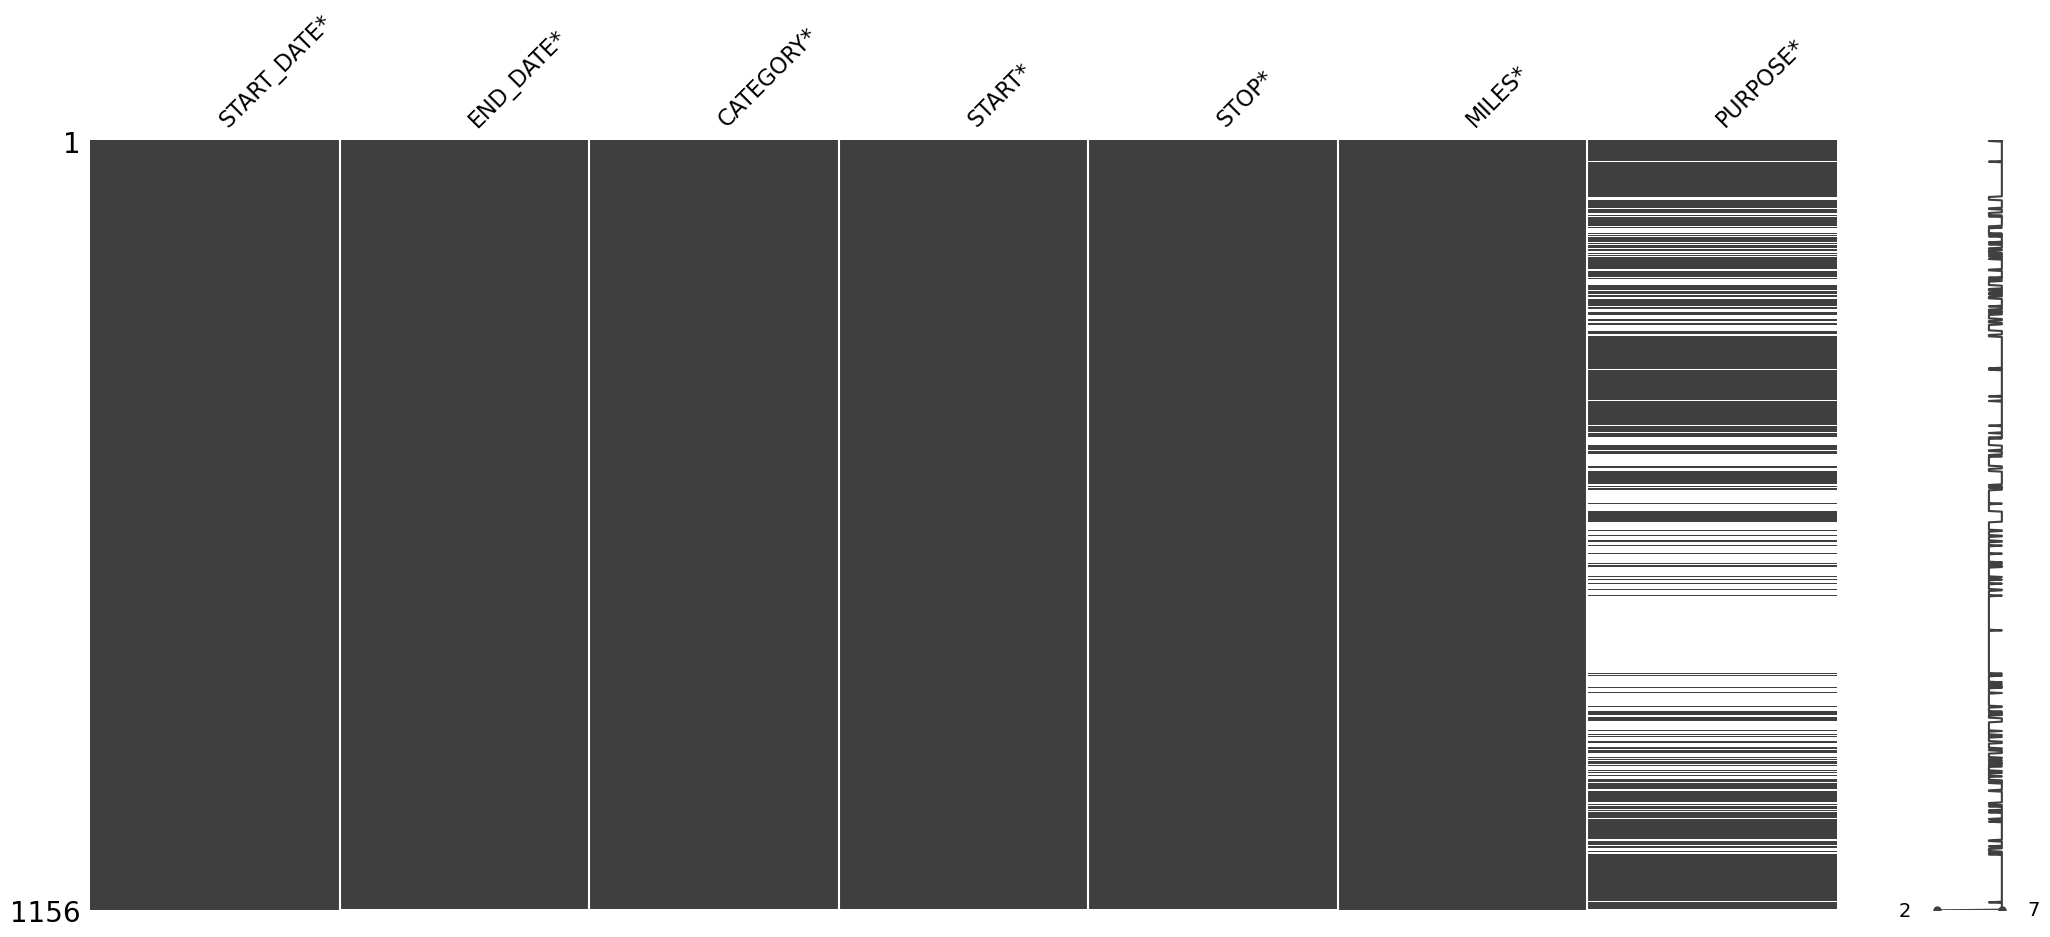

In [91]:
msno.matrix(df)

In [92]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [93]:
df = df.dropna()

In [94]:
# Changing data type of Start_date and end_date.

In [95]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [96]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M', errors='coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M', errors='coerce')

In [97]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [98]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in df['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

    
df['HOUR'] = hour
df['DAY'] = day
df['DAY OF WEEK'] =  dayofweek
df['MONTH'] = month
df['WEEKDAY'] =  weekday


In [99]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Categories we have 

In [100]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

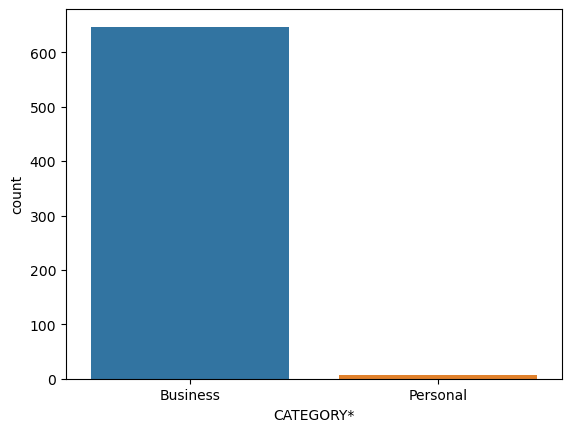

In [101]:
sns.countplot(x = 'CATEGORY*', data = df)

# How long people travel with uber ?

Text(0, 0.5, 'Customers')

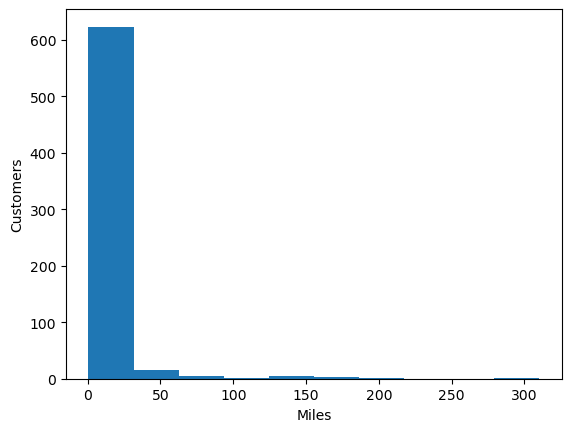

In [102]:
df['MILES*'].plot.hist()
plt.xlabel('Miles')
plt.ylabel('Customers')

# What hour do most people book uber?

Text(0.5, 1.0, 'Number of trips vs hours')

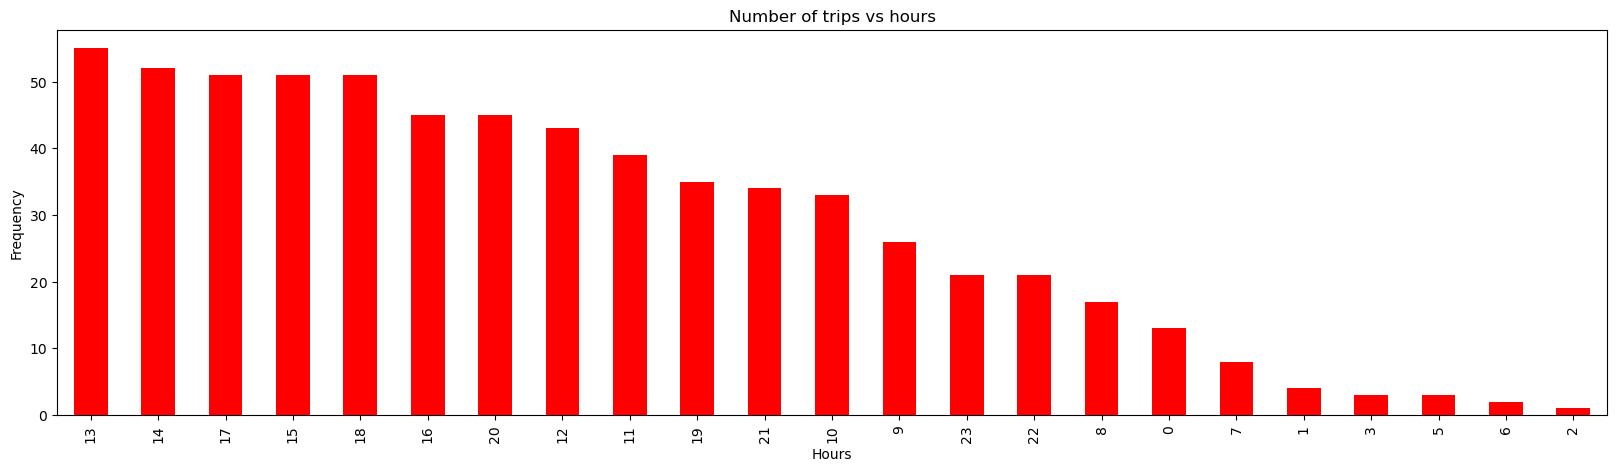

In [105]:
hours = df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind =  'bar', color = 'red', figsize=(20,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs hours')

# Which day has the highest number of trips?

<Axes: >

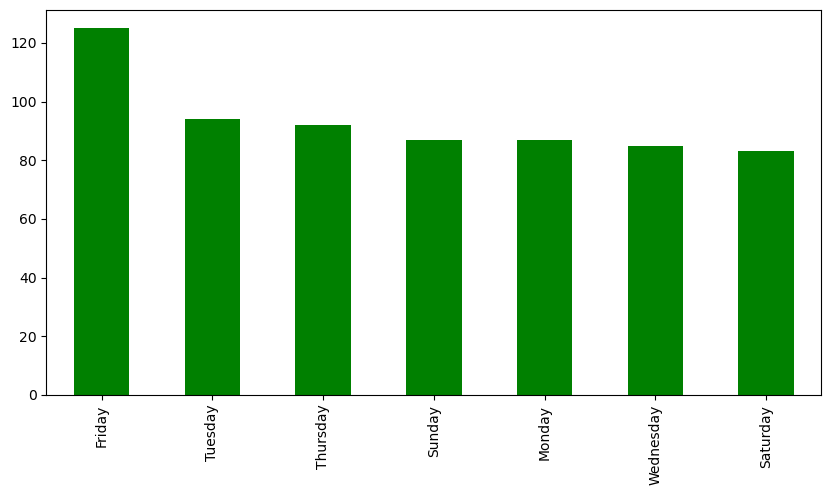

In [106]:
df['WEEKDAY'].value_counts().plot(kind = 'bar', color = 'green', figsize=(10,5))

# Which day of the month people book the uber most

<Axes: >

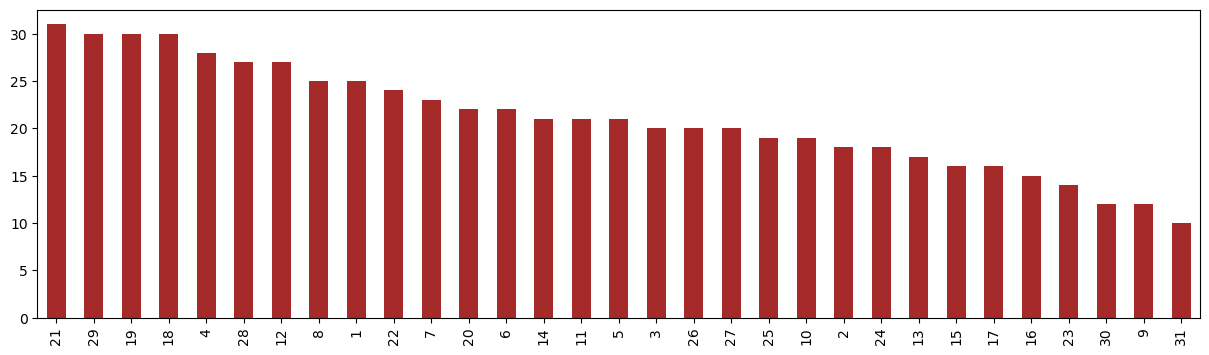

In [107]:
df['DAY'].value_counts().plot(kind = 'bar', color = 'Brown', figsize=(15,4))

# Which month of the year people book the uber most

<Axes: >

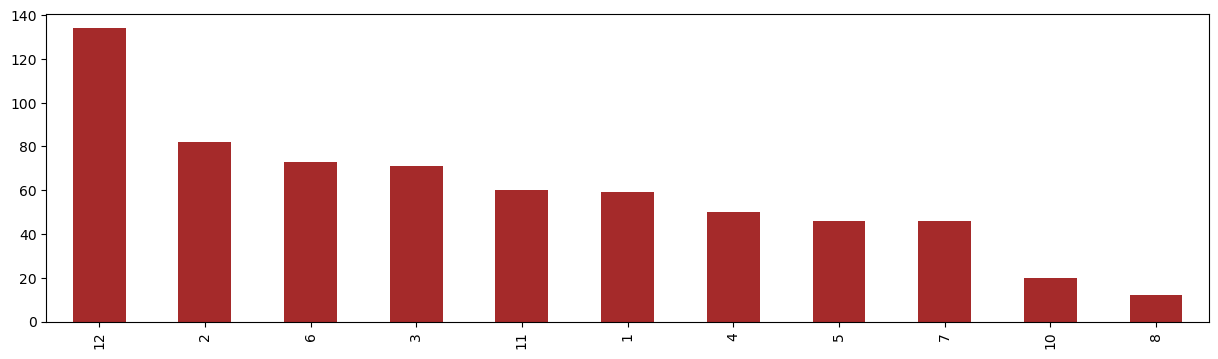

In [108]:
df['MONTH'].value_counts().plot(kind = 'bar', color = 'Brown', figsize=(15,4))

# Where most of the trips gets started

<Axes: >

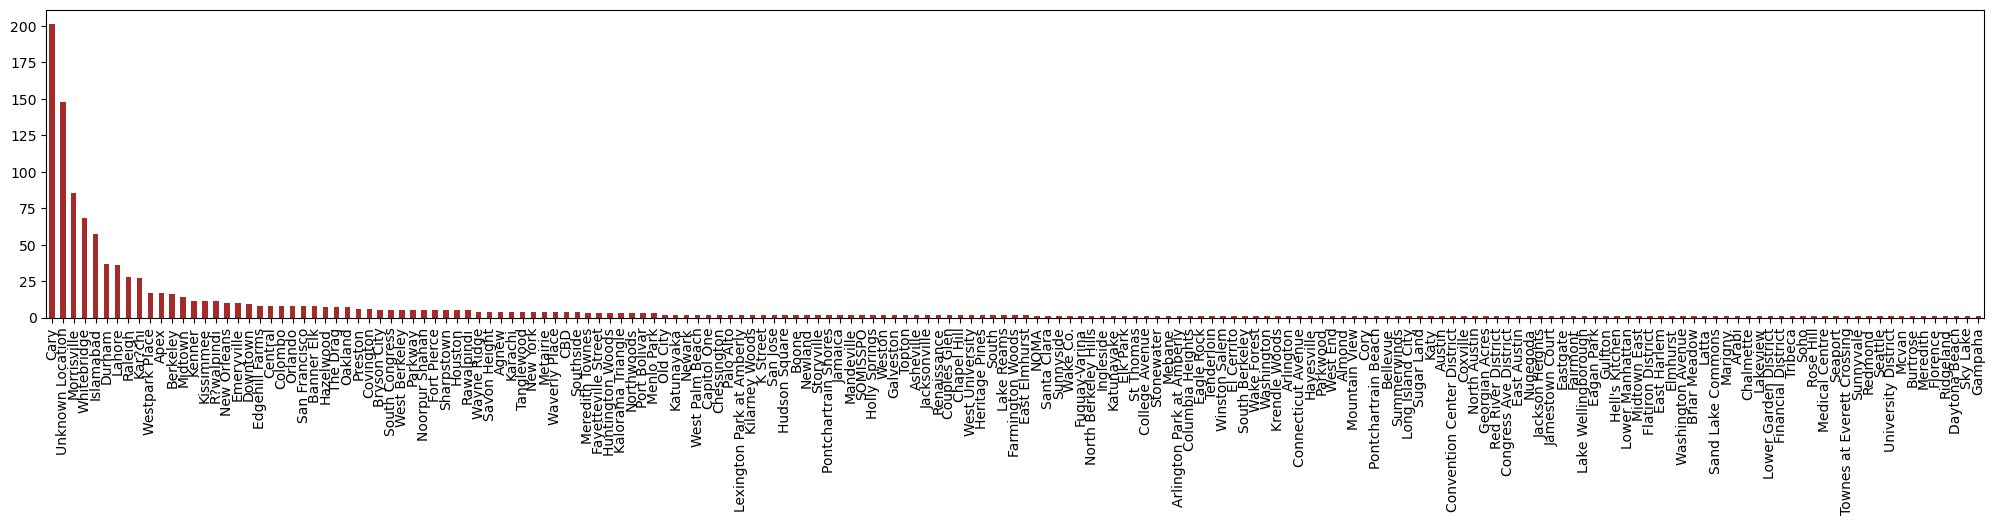

In [26]:
df['START*'].value_counts().plot(kind = 'bar', color = 'Brown', figsize=(25,4))